<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Remote%20Sensing/modis_download_processing_luna_r_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODIS Images download and Processing with "luna" & 'terra" Package in R

Zia Ahmed, Unversity at Buffalo

### Introduction

The Moderate Resolution Imaging Spectroradiometer (MODIS) is a key instrument onboard two NASA satellite platforms: Terra and Aqua. These satellites were launched in 1999 and 2002, respectively. The MODIS sensors provide valuable Earth observation data, capturing images of the Earth's surface and atmosphere across a wide range of spectral bands.

MODIS has a spatial resolution ranging from 250 meters to 1 kilometer, depending on the specific band being observed. It covers a broad range of wavelengths, from the visible to the thermal infrared, which allows it to capture a wide variety of information about the Earth's land, ocean, and atmosphere. Some of the applications and data products derived from MODIS include:

1.  **Land Cover and Land Use Monitoring:** MODIS data can be used to monitor changes in land cover and land use over time, helping scientists and researchers track urban expansion, deforestation, agriculture, and other land changes.

2.  **Vegetation Monitoring:** MODIS can calculate vegetation indices like the Normalized Difference Vegetation Index (NDVI) and the Enhanced Vegetation Index (EVI), which provide information about vegetation health, density, and photosynthetic activity.

3.  **Oceanography:** MODIS observes ocean surface properties such as sea surface temperature, chlorophyll concentration, and ocean color. These data are used to study ocean currents, marine ecosystems, and the effects of climate change on the oceans.

4.  **Atmospheric Monitoring:** MODIS measures atmospheric parameters like cloud cover, aerosols, and water vapor. These data help improve weather forecasting, monitor air quality, and study atmospheric processes.

5.  **Cryosphere Studies:** MODIS monitors changes in ice cover, snow extent, and glacial retreat, providing valuable insights into the Earth's polar regions.

6.  **Climate Studies:** By providing long-term, consistent data, MODIS contributes to climate research, including tracking climate trends, studying carbon cycles, and assessing the impact of climate change.

7.  **Natural Disasters and Emergency Response:** MODIS data are used for disaster management and response, including tracking wildfires, floods, and hurricanes, and assessing their impact on affected areas.

### Spatial and spectral properties

The MODIS sensor on the Terra and Aqua satellites captures data across a range of spatial and spectral properties. These properties are crucial for understanding the information that MODIS provides about the Earth's surface, atmosphere, and oceans.

### MODIS temporal Resolution

The MODIS Land high-level products distributed by LP DAAC are created at different temporal resolutions, depending on the orbital cycle of the instruments.. These time steps are possible in the generation of MODIS Land products:

Daily, 4-Day, 8-Day, 16-Day, Monthly, Quarterly, Yearly

### MODIS Processing Levels

LP DAAC distributes MODIS Land data processed to level-2 or higher:

-   Level-2: derived geophysical variables at the same resolution and location as level-1 source data (swath products)

-   Level-2G: level-2 data mapped on a uniform space-time grid scale (Sinusoidal)

-   Level-3: gridded variables in derived spatial and/or temporal resolutions

-   Level-4: model output or results from analyses of lower-level data

### MODIS Tiling Grid

The MODIS tiling grid, also known as the Sinusoidal Grid, is a specific spatial reference system used to organize and distribute MODIS data products. This grid is designed to provide a standardized way of dividing the Earth's surface into tiles, which facilitates data management, processing, and distribution. The sinusoidal projection is chosen because it minimizes distortions in both area and shape, making it suitable for global coverage.

Most standard MODIS Land products use this Sinusoidal grid tiling system. Tiles are 10 degrees by 10 degrees at the equator. The tile coordinate system starts at (0,0) (horizontal tile number, vertical tile number) in the upper left corner and proceeds right (horizontal) and downward (vertical). The tile in the bottom right corner is (h35,v17).

Higher resolution products with a spatial resolution of 250, 500, and 1,000 meters are orgainized in non-overlapping tiles based on a sinusoidal grid. There are 460 non-fill tiles covering the globe.

## Downloading MODIS data with Luna pacakge

In this exercise, we will download MODIS [MOD13Q1 data product](https://lpdaac.usgs.gov/products/mod13q1v006/) from [here](https://lpdaac.usgs.gov/). [An Earthdata Login](https://www.earthdata.nasa.gov/learn/get-started) is required of all users before they can download data or use selected tools from any of the Distributed Active Archive Centers (DAACs) that comprise NASA's Earth Observing System Data and Information System (EOSDIS)". If you do not have an account, you can sign up [here](https://urs.earthdata.nasa.gov/users/new)

MOD13Q1 data are produced every 16 days as Level 3 product at 250 m spatial resolution. MOD13Q1 offers two primary vegetation layers, NDVI and EVI. NDVI is the NDVI continuity index to the current NDVI derived by NOAA-AVHRR. EVI is Enhanced Vegetation Index which has increased sensitivity over high biomass region. The algorithm selects the best available pixel values from all acquisitions from the 16 days period. Low clouds, low angle of view, and highest NDVI/EVI. Along with the vegetation layers and the two quality layers, the HDF file will have MODIS reflectance bands 1 (red), 2 (near-infrared), 3 (blue), and 7 (mid-infrared), as well as four observation layers.

We will use R package [luna](https://github.com/rspatial/luna) to download MOD13Q1 using username and password for your (free) EOSDIS account.

### Insatll rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp310-cp310-linux_x86_64.whl


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Required R Packages

In [3]:
%%R
pkg <- c('tidyverse', 'raster', 'rgdal','terra','tidyterra', 'maptools', 'sf', 'classInt', 'RColorBrewer')
new.packages <- pkg[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Install  luna and geodata packages

In [ ]:
%%R
pkg_01 <- c('luna','geodata')
new.packages <- pkg_01[!(pkg_01 %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/', repos='https://rspatial.r-universe.dev')

### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library (terra)
library (tidyterra)
library(raster)
library(rgdal)
library(sf)
library(luna)
library(geodata)
library(tidyverse)
library (RColorBrewer)


###  Find MODIS Product


In [ ]:
%%R
modis <- getProducts("^MOD|^MYD|^MCD")
head(modis,20)

       provider             concept_id short_name version
806  LPDAAC_ECS C1000000120-LPDAAC_ECS     MOD44B     051
1433 LPDAAC_ECS C1000000400-LPDAAC_ECS   MCD43D10     006
1447 LPDAAC_ECS C1000000401-LPDAAC_ECS   MCD43D33     006
1452 LPDAAC_ECS C1000000402-LPDAAC_ECS   MCD43D45     006
1454 LPDAAC_ECS C1000000403-LPDAAC_ECS   MCD43D26     006
1456 LPDAAC_ECS C1000000404-LPDAAC_ECS   MCD43D49     006
1458 LPDAAC_ECS C1000000405-LPDAAC_ECS   MCD43D20     006
1460 LPDAAC_ECS C1000000406-LPDAAC_ECS   MCD43D24     006
1462 LPDAAC_ECS C1000000407-LPDAAC_ECS   MCD43D55     006
1464 LPDAAC_ECS C1000000408-LPDAAC_ECS   MCD43D38     006
1466 LPDAAC_ECS C1000000409-LPDAAC_ECS   MCD43D05     006
1468 LPDAAC_ECS C1000000410-LPDAAC_ECS   MCD43D37     006
1470 LPDAAC_ECS C1000000411-LPDAAC_ECS   MCD43D07     006
1472 LPDAAC_ECS C1000000412-LPDAAC_ECS    MCD43A4     006
1474 LPDAAC_ECS C1000000413-LPDAAC_ECS    MCD43C4     006
1476 LPDAAC_ECS C1000000414-LPDAAC_ECS   MCD43D59     006
1485 LPDAAC_EC

## Download MOD13Q1 product

We will download MOD13Q1 version 6.1 product for entire Bangladesh for the month of January and February, 2023. First, we will import a boundary of Bangladesh (level =0) using **gadm()** function of geodata package and we will use this file as a "aoi" in following **getMODIS()** function of luna package. Then we will apply the following function to download and save them in a directory.



In [5]:
%%R
bd <- geodata::gadm("Bangladesh", level=0, path=".")


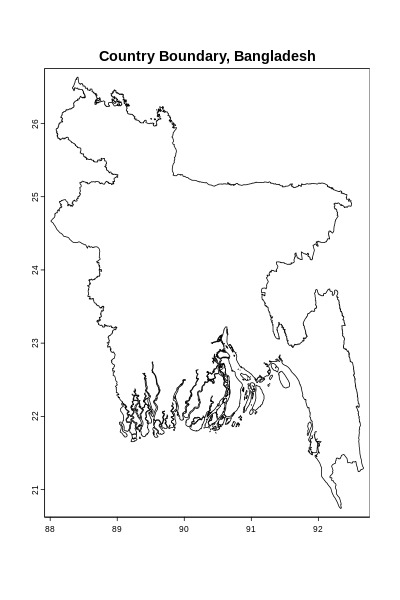

In [6]:
 %%R -w 400 -h 600 -u px
plot(bd, main="Country Boundary, Bangladesh")

In [ ]:
%%R
st_crs(bd)

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]


In [ ]:
%%R
mf<-getModis(product = "MOD13Q1",
             start_date = "2023-01-01",
             end_date = "2023-01-30",
             aoi=bd,
             version="061",
             download=TRUE,
             path="/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF",
             username="yor user name",
             password="your password",
             server="LPDAAC_ECS",
             overwrite=TRUE)


### Data Exploration

MODIS data, including the data captured by the Moderate Resolution Imaging Spectroradiometer (MODIS) sensor, is often distributed in HDF (Hierarchical Data Format). This file format is commonly used for storing and organizing large amounts of complex data. HDF files are designed to handle a variety of data types, including multidimensional arrays, structured and unstructured data, metadata, and more. The format is particularly well-suited for scientific and remote sensing data, such as satellite imagery, climate data, and geospatial data.

When working with MODIS data, you'll often encounter HDF files that contain various datasets representing different spectral bands, geolocation information, quality flags, and other data products. To work with HDF files in your preferred programming language, you'll need to use the appropriate libraries and tools. We can use **terra** package to explore and visualize raster for

### Read HDF file

In [8]:
%%R
hdf_dir<- "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF"
hdf_list <- list.files(hdf_dir, pattern = "\\.hdf$", full.names = TRUE)
hdf_list

[1] "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF/MOD13Q1.A2022353.h25v06.061.2023006045533.hdf"
[2] "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF/MOD13Q1.A2022353.h26v06.061.2023006034930.hdf"
[3] "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF/MOD13Q1.A2023001.h25v06.061.2023019191946.hdf"
[4] "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/HDF/MOD13Q1.A2023001.h26v06.061.2023019191919.hdf"


#### Extract first HDF file

In [9]:
%%R
r1<-terra::rast(hdf_list[1])
r1

class       : SpatRaster 
dimensions  : 4800, 4800, 12  (nrow, ncol, nlyr)
resolution  : 231.6564, 231.6564  (x, y)
extent      : 7783654, 8895604, 2223901, 3335852  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=sinu +lon_0=0 +x_0=0 +y_0=0 +R=6371007.181 +units=m +no_defs 
sources     : MOD13Q1.A2022353.h25v06.061.2023006045533.hdf:MODIS_Grid_16DAY_250m_500m_VI:250m 16 days NDVI  
              MOD13Q1.A2022353.h25v06.061.2023006045533.hdf:MODIS_Grid_16DAY_250m_500m_VI:250m 16 days EVI  
              MOD13Q1.A2022353.h25v06.061.2023006045533.hdf:MODIS_Grid_16DAY_250m_500m_VI:250m 16 days VI Quality  
              ... and 9 more source(s)
varnames    : MOD13Q1.A2022353.h25v06.061.2023006045533 
              MOD13Q1.A2022353.h25v06.061.2023006045533 
              MOD13Q1.A2022353.h25v06.061.2023006045533 
              ...
names       : "250m~NDVI", "250m~ EVI", "250m~lity", "250m~ance", "250m~ance", "250m~ance", ... 


####  CRS

In [ ]:
%%R
crs(r1)

[1] "PROJCRS[\"unnamed\",\n    BASEGEOGCRS[\"Unknown datum based upon the custom spheroid\",\n        DATUM[\"Not specified (based on custom spheroid)\",\n            ELLIPSOID[\"Custom spheroid\",6371007.181,0,\n                LENGTHUNIT[\"metre\",1,\n                    ID[\"EPSG\",9001]]]],\n        PRIMEM[\"Greenwich\",0,\n            ANGLEUNIT[\"degree\",0.0174532925199433,\n                ID[\"EPSG\",9122]]]],\n    CONVERSION[\"unnamed\",\n        METHOD[\"Sinusoidal\"],\n        PARAMETER[\"Longitude of natural origin\",0,\n            ANGLEUNIT[\"degree\",0.0174532925199433],\n            ID[\"EPSG\",8802]],\n        PARAMETER[\"False easting\",0,\n            LENGTHUNIT[\"Meter\",1],\n            ID[\"EPSG\",8806]],\n        PARAMETER[\"False northing\",0,\n            LENGTHUNIT[\"Meter\",1],\n            ID[\"EPSG\",8807]]],\n    CS[Cartesian,2],\n        AXIS[\"easting\",east,\n            ORDER[1],\n            LENGTHUNIT[\"Meter\",1]],\n        AXIS[\"northing\",north,\

#### Dimension

In [10]:
%%R
dim(r1)

[1] 4800 4800   12


### Resolution

In [ ]:
%%R
res(r1)

[1] 231.6564 231.6564


#### Number of layers

In [ ]:
%%R
nlyr(r1)

[1] 12


#### Layer Name

In [ ]:
%%R
names(r1)

 [1] "\"250m 16 days NDVI\""                     
 [2] "\"250m 16 days EVI\""                      
 [3] "\"250m 16 days VI Quality\""               
 [4] "\"250m 16 days red reflectance\""          
 [5] "\"250m 16 days NIR reflectance\""          
 [6] "\"250m 16 days blue reflectance\""         
 [7] "\"250m 16 days MIR reflectance\""          
 [8] "\"250m 16 days view zenith angle\""        
 [9] "\"250m 16 days sun zenith angle\""         
[10] "\"250m 16 days relative azimuth angle\""   
[11] "\"250m 16 days composite day of the year\""
[12] "\"250m 16 days pixel reliability\""        


#### RGB Plot

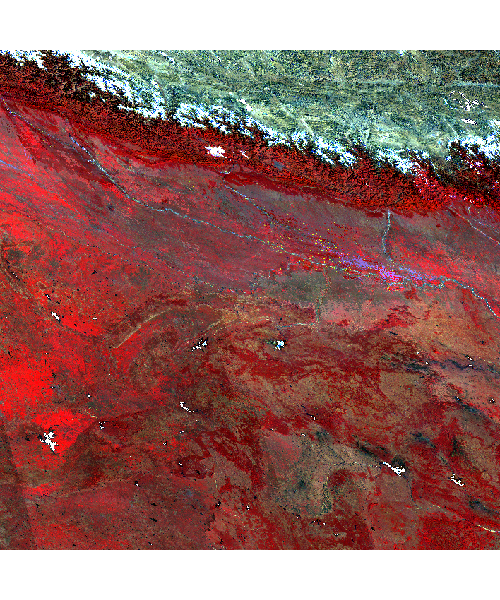

In [ ]:
%%R -w 500 -h 600 -u px
# False color composite NIR:Red:Green
plotRGB(r1, r = 5, g = 4, b = 6, stretch="lin")

#### Plot NDVI

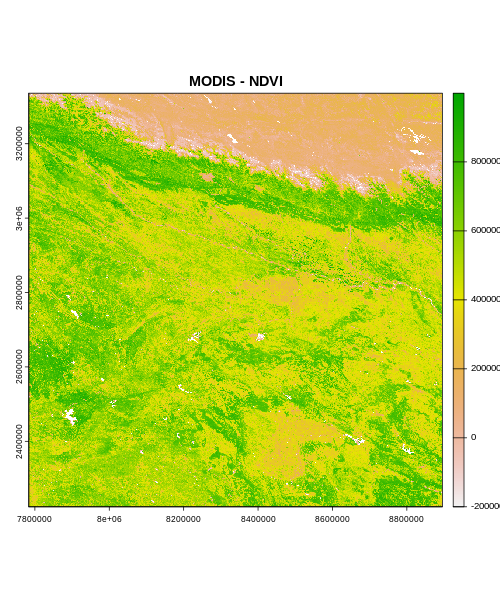

In [ ]:
%%R -w 500 -h 600 -u px
plot(r1[[1]], main = "MODIS - NDVI")

### Quality Control

It is important to note that not all pixels in MODIS images are suitable for land area analysis. For instance, pixel quality may be adversely affected by cloud cover or other atmospheric factors. Therefore, each image must be processed in advance to eliminate the values that are not applicable.

The QA information contained in each MODIS file is used to determine the pixels to be eliminated. This information is encoded in a complex bit encoding format, which allows for high storage efficiency but is much more difficult to manipulate.


We can plot band-12 to see Pixel Reliability, where


* -1 =  Fill/No Data Not Processed

* 0 =  Good Data Use with confidence

* 1 =  Marginal data Useful, but look at other QA information

* 2 =  Snow/Ice Target covered with snow/ice

* 3 =  Cloudy Target not visible, covered with cloud

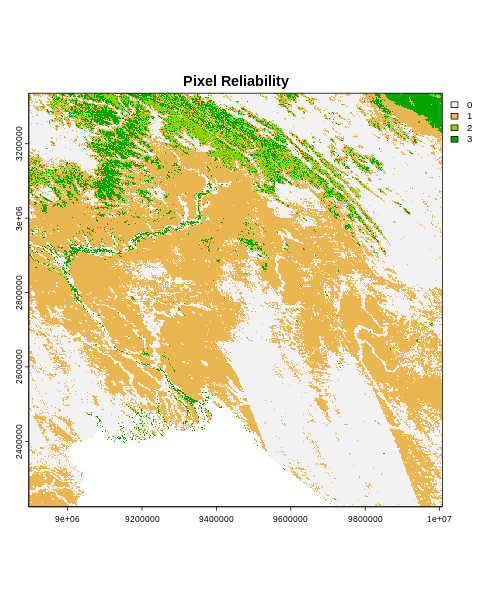

In [ ]:
%%R -w 500 -h 600 -u px
pr <- r1[[12]]
plot(pr, main = "Pixel Reliability")

To interpret the pixel level QA values, we need to convert them from decimal to binary format. The luna package offers a function for this conversion and create a mask from the QA band. The user need to specify a matrix (“qabits”) with the start and end of the quality assessment (QA) bits considered, and specify a list (“reject”) with the values to be rejected (in the image) matching the rows in qabits. Following the table above, we will define the “reject” values to exclude pixels affected by cloud and cloud shadow

In [ ]:
%%R
from <- c(1,3,11,14)
to   <- c(2,3,11,14)
reject <- c("01,10", "1", "1", "1")
qa_bits <- cbind(from, to, reject)
qa_bits

     from to   reject 
[1,] "1"  "2"  "01,10"
[2,] "3"  "3"  "1"    
[3,] "11" "11" "1"    
[4,] "14" "14" "1"    


We will use band 3 250m 16 days VI Quality that has the quality data.

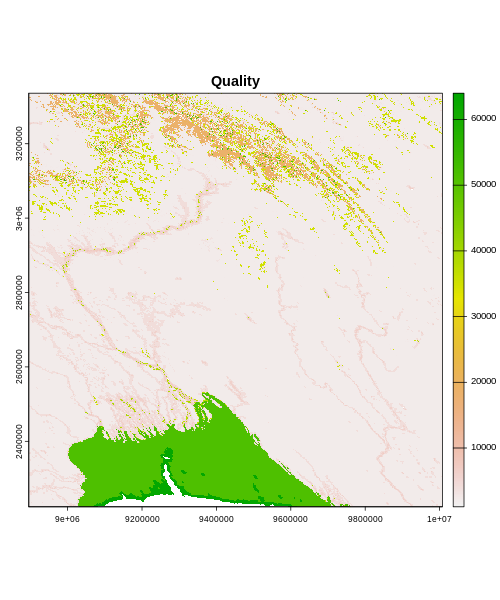

In [ ]:
%%R -w 500 -h 600 -u px
qc <- r1[[3]]
plot(qc, main = "Quality")

### Masking quality band

The luna package has a modis_mask method to create a mask from the quality band and the parameters defined above.

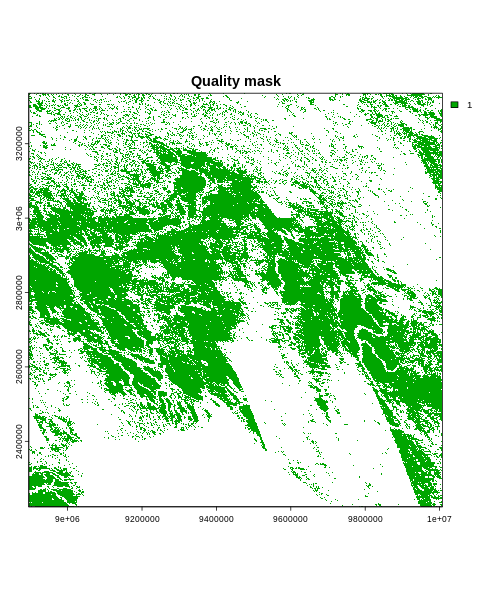

In [ ]:
%%R -w 500 -h 600 -u px
quality_mask <- modis_mask(qc, 16, qa_bits)
plot(quality_mask, main="Quality mask")

The plot indicates the desired number of pixels to be retained. Now that the quality mask is in place, it can be applied to all bands. Visually verifying the outcome of the masking is always beneficial, as many pixels may be erroneously labeled as “low quality”. Residual noise can then be filtered during subsequent gap-fill and smoothing operations.

In [ ]:
%%R
rmask <- mask(r1, quality_mask)

And we can plot the results, here as a “false color composite” (NIR:Red:Green)

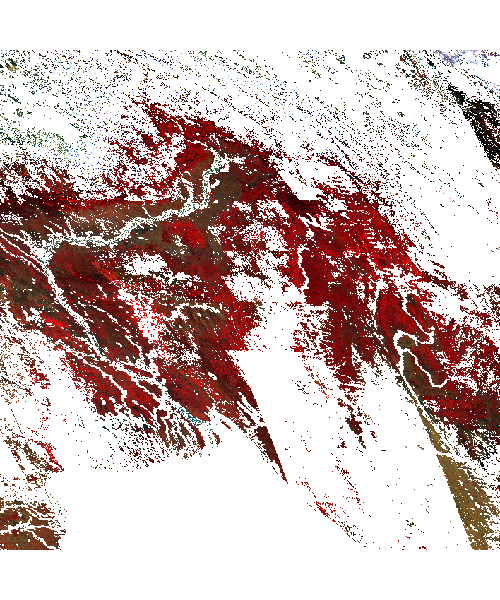

In [ ]:
%%R -w 500 -h 600 -u px
plotRGB(rmask, r = 5, g = 4, b = 6, stretch="lin")

We can write cloud mask raster as a multiband geoTIF

In [ ]:
%%R
terra::writeRaster(rmask, "/content/drive/MyDrive/Data/Bangladesh/MODIS/LUNA/TIF/rmask_r1.tif", filetype = "GTiff", overwrite = TRUE)

### Processing HDF file

Two  tiles ***(H25V06, H26V06)*** of MODIS were covered together entire Bangladesh. We will process these HDF files for the January 6, 2023.

#### Extract Band (NDVI) from a HDF file

In [11]:
%%R
hdf_01<- file.path(hdf_dir, "MOD13Q1.A2022353.h26v06.061.2023006034930.hdf")
hdf_02<- file.path(hdf_dir, "MOD13Q1.A2022353.h25v06.061.2023006045533.hdf")
r1<- rast(hdf_01)
r2<- rast(hdf_02)

In [12]:
%%R
ndvi_01<-r1[[1]]
ndvi_02<-r2[[1]]

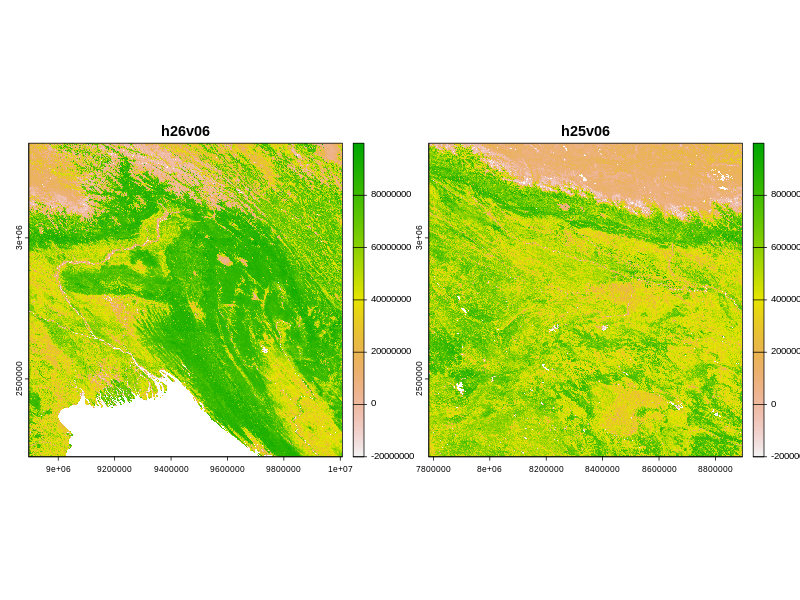

In [15]:
%%R -w 800 -h 600 -u px
par(mfrow=c(1,2))
plot(ndvi_01, main="h26v06")
plot(ndvi_02, main="h25v06")

#### Mosaic

Now wee use mosaic() function to mosaic  two SpatRasters


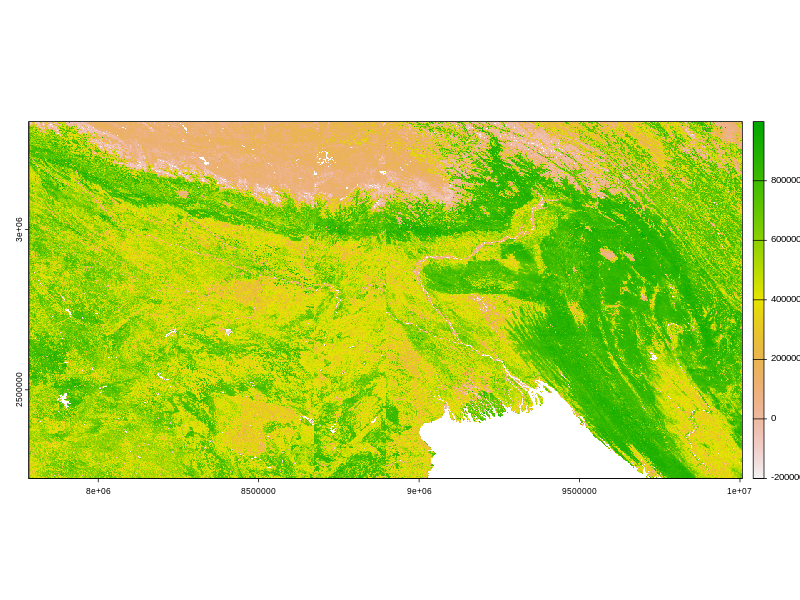

In [16]:
%%R  -w 800 -h 600 -u px
ndvi<-mosaic(ndvi_01, ndvi_02)
plot(ndvi)

#### Projection

 MODIS Land products use the Sinusoidal grid tiling system. Tiles are 10 degrees by 10 degrees at the equator. The tile coordinate system starts at (0,0) (horizontal tile number, vertical tile number) in the upper left corner and proceeds right (horizontal) and downward (vertical). The tile in the bottom right corner is (35,17).

we will use CRS of  hilly_dem_BTM to change the projection of NDVI raster:

> BTM: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs

      



In [19]:
%%R
dem=rast("/content/drive/MyDrive/Data/Bangladesh/Raster/hilly_dem_BTM.tiff")

In [20]:
%%R
ndvi_btm<-terra::project(ndvi, crs(dem))
st_crs(ndvi_btm)

Coordinate Reference System:
  User input: PROJCRS["unknown",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",90,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",-2000000,
            LENGT

Reading layer `bd_boundary_BTM' from data source 
  `/content/drive/MyDrive/Data/Bangladesh/Shapefiles/bd_boundary_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


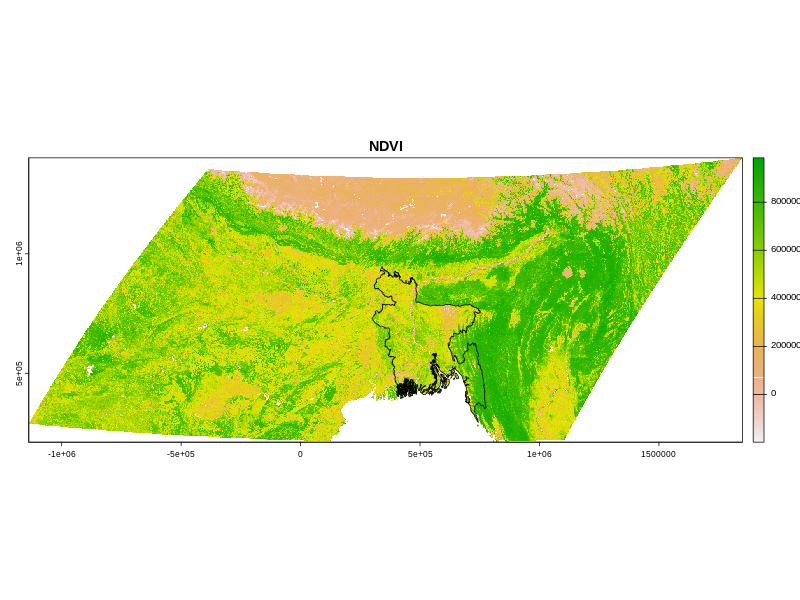

In [21]:
%%R  -w 800 -h 600 -u px
bd_btm<-st_read("/content/drive/MyDrive/Data/Bangladesh/Shapefiles/bd_boundary_BTM.shp")
plot(ndvi_btm, main="NDVI")
plot(bd_btm$geometry, add =TRUE)

#### Clip or crop

**crop()** function of terra project cut out a part of a SpatRaster with a SpatExtent (bd boundary file):

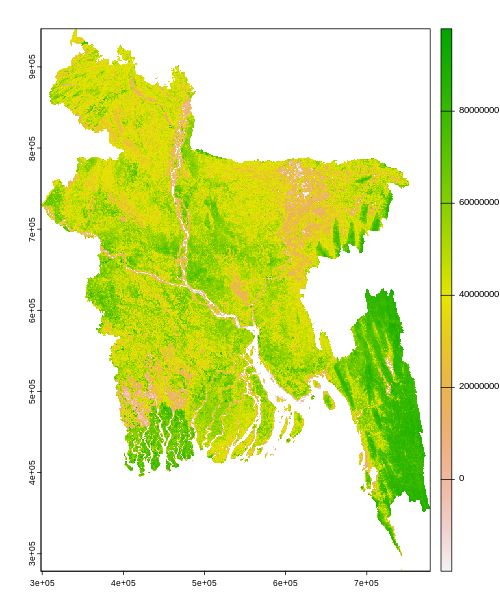

In [22]:
%%R -w 500 -h 600 -u px
ndvi.bd<-crop(ndvi_btm, bd_btm, mask=TRUE)
plot(ndvi.bd)

#### Convert 0-1 scale

We expect the NDVI to be between 0  and 1. Due to various reasons, there may values slightly outside this range. First clamp values of the image between 0 and 1.

In [23]:
%%R
ndvi.bd_scale = ndvi.bd/100000000
ndvi.bd_scale<- clamp(ndvi.bd_scale, 0, 1)

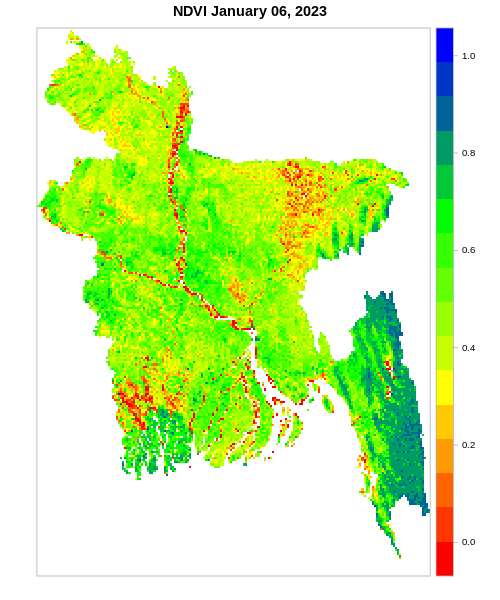

In [25]:
%%R -w 500 -h 600 -u px
rgb.palette <- colorRampPalette(c("red","yellow","green", "blue"), space = "rgb")

spplot(ndvi.bd_scale, main = "NDVI January 06, 2023",
   par.settings=list(axis.line=list(col="darkgrey",lwd=1)),
   col.regions=rgb.palette(100))

### Further Reading

1. [The Moderate Resolution Imaging Spectroradiometer (MODIS)](https://rspatial.org/modis/1-introduction.html#google_vignette)

2. https://github.com/ornldaac/modis_restservice_qc_filter_R/tree/master